# **<CENTER><U>HEART DISEASE ANALYSIS</U></CENTER>**

### **Business Understanding**
Heart disease remains one of the leading causes of death worldwide, placing a significant burden on healthcare systems and affecting quality of life. Early and accurate diagnosis can lead to better treatment and prevention strategies. This project leverages machine learning to aid in predicting heart disease, providing healthcare professionals with a valuable tool to assess patient risk. By identifying high-risk individuals early, this model can support decision-making, improve patient outcomes, and potentially reduce healthcare costs associated with advanced-stage treatments.

### *1.Business Objectives*
**Goal:** The primary objective is to create a predictive model that can identify individuals at high risk of heart disease, assisting healthcare providers in proactive, data-driven interventions.

**Business Success Criteria:** Success in this project means improving the accuracy and efficiency of heart disease screening, thereby reducing diagnosis time, improving patient outcomes, and lowering healthcare costs associated with heart disease management.

### *2.Assess Situation*
**Resources:** Identify available resources, such as heart disease datasets, data storage, processing capabilities, and team expertise in machine learning.

**Requirements:** Gather project requirements, such as data privacy standards, ethical guidelines, and necessary compliance with healthcare regulations.

**Risks and Contingencies:** Potential risks include data quality issues, model overfitting, or inadequate interpretability for medical professionals. Mitigating these risks involves thorough data preprocessing, validation, and choosing interpretable algorithms.

**Cost-Benefit Analysis:** Compare the anticipated costs (time, technology, and labor) against the potential benefits, such as improved diagnostic efficiency, reduced hospital readmissions, and better patient health outcomes.

### *3.Determine Data Mining Goals*
**Technical Success Criteria:** The technical objective is to build a machine learning model that achieves high predictive accuracy and interpretability, allowing healthcare providers to understand and trust the model’s predictions. Key performance indicators (KPIs) include metrics like accuracy, recall, precision, and F1-score.

### *4.Project Plan*

**Technologies and Tools:** Select tools such as Python, Scikit-Learn, and Jupyter Notebooks for data analysis, model building, and testing.

**Detailed Plan for Phases:** Outline each phase—data collection, data preprocessing, model training, evaluation, and deployment—along with specific tasks, timelines, and dependencies to ensure the project stays on track and meets all objectives.



### **Data Understanding**
The Data Understanding phase involves gathering, exploring, and assessing the dataset to gain insights into its structure and quality. This step helps identify key variables, evaluate data completeness, and uncover patterns or correlations that may impact model performance. By thoroughly understanding the data, we can make informed decisions about preprocessing and feature selection for effective heart disease prediction.

In [161]:
## Importing the modules
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import sklearn

In [162]:
## Importing the dataset
df = pd.read_csv("Data\heart.csv")

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\USER\AppData\Local\Temp\ipykernel_17296\2229245502.py:2: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv("Data\heart.csv")


In [163]:
## preview of the data 
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


| **Feature**  | **Description**                                                                                       |
|--------------|-------------------------------------------------------------------------------------------------------|
| **age**      | Age of the patient (in years).                                                                        |
| **sex**      | Sex of the patient (1 = male, 0 = female).                                                            |
| **cp**       | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital).                                       |
| **chol**     | Serum cholesterol in mg/dL.                                                                           |
| **fbs**      | Fasting blood sugar > 120 mg/dL (1 = true; 0 = false).                                               |
| **restecg**  | Resting electrocardiographic results: <br> 0: Normal <br> 1: ST-T wave abnormality <br> 2: Left ventricular hypertrophy  |
| **thalach**  | Maximum heart rate achieved.                                                                           |
| **exang**    | Exercise-induced angina (1 = yes; 0 = no).                                                            |
| **oldpeak**  | ST depression induced by exercise relative to rest.                                                  |
| **slope**    | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping            |
| **ca**       | Number of major vessels (0-3) colored by fluoroscopy.                                                 |
| **thal**     | Thalassemia status: <br> 1: Normal <br> 2: Fixed defect <br> 3: Reversible defect                     |
| **target**   | Target variable indicating the presence of heart disease (1 = presence, 0 = absence).                 |

### Exploratory Data Analysis

In [164]:
## data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [165]:
## getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [166]:
## check for nulls
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [167]:
# Get all columns from the DataFrame
columns = df.columns

# Iterate over each column and print its unique values
for colum in columns:
    unique_values = df[colum].unique()  # Get unique values for the current column
    print(f"Unique values in '{colum}': {unique_values}")

Unique values in 'age': [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
Unique values in 'sex': [1 0]
Unique values in 'cp': [0 1 2 3]
Unique values in 'trestbps': [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
Unique values in 'chol': [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 2

### Univariate Analysis

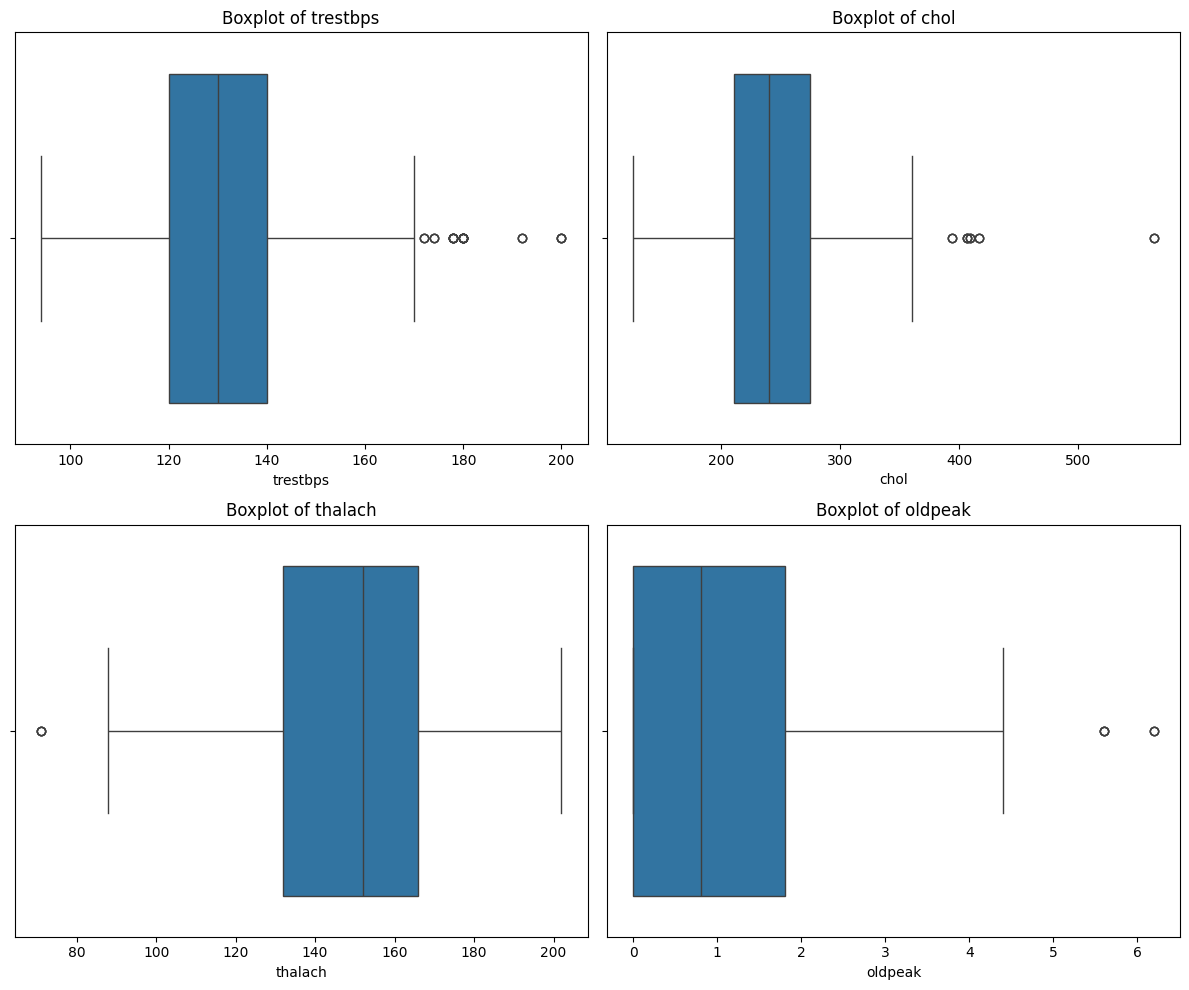

In [168]:
## checking for outliers
columns = df[['trestbps','chol','thalach','oldpeak']]
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # Adjust figure size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create boxplots for each column in the subplots
for ax, col in zip(axes, columns.columns):
    sns.boxplot(x=columns[col], ax=ax, orient='h')  # Horizontal boxplot
    ax.set_title(f'Boxplot of {col}')  # Title for each plot
    ax.set_xlabel(col)  # Label for x-axis
# Hide any unused subplots (if there are more axes than columns)
for i in range(len(columns.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()  # Display the plots

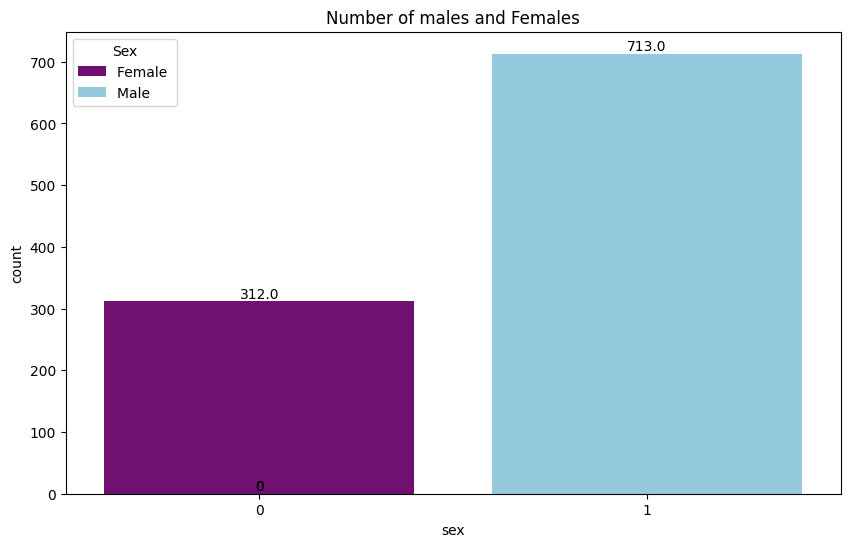

In [169]:
## Number of the Males and Females 
plt.figure(figsize=(10,6))
ax=sns.countplot(data=df,x='sex',hue='sex',palette=('purple','skyblue'))
plt.title('Number of males and Females')
ax.legend(title='Sex', labels=['Female ', 'Male '], loc='upper left')
plt.xlabel('sex')
plt.ylabel('count')
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height}',(p.get_x()+p.get_width() / 2, height), ha='center',va='bottom',fontsize=10)

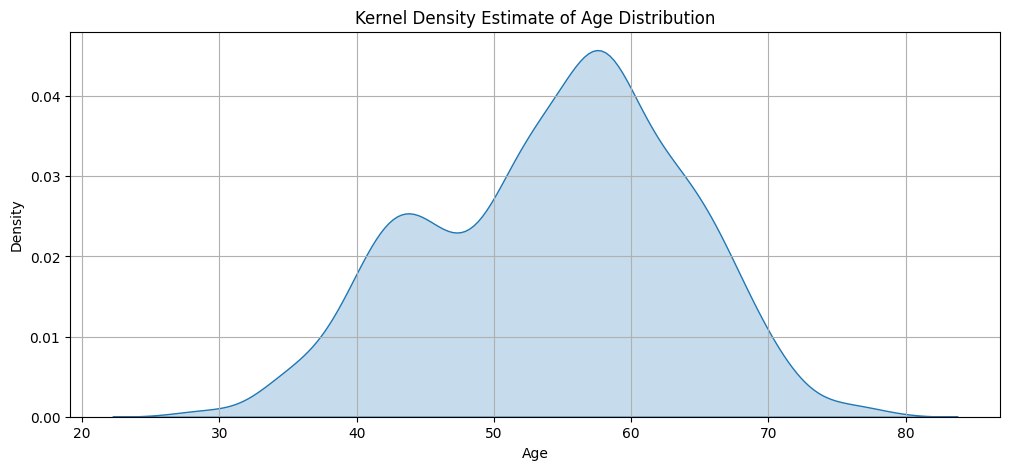

In [199]:
### plot for age distribution
plt.figure(figsize=(12, 5))
sns.kdeplot(df['age'], fill=True)
plt.title('Kernel Density Estimate of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid()
plt.show()

### BI-Variate And MultiVariate Analysis

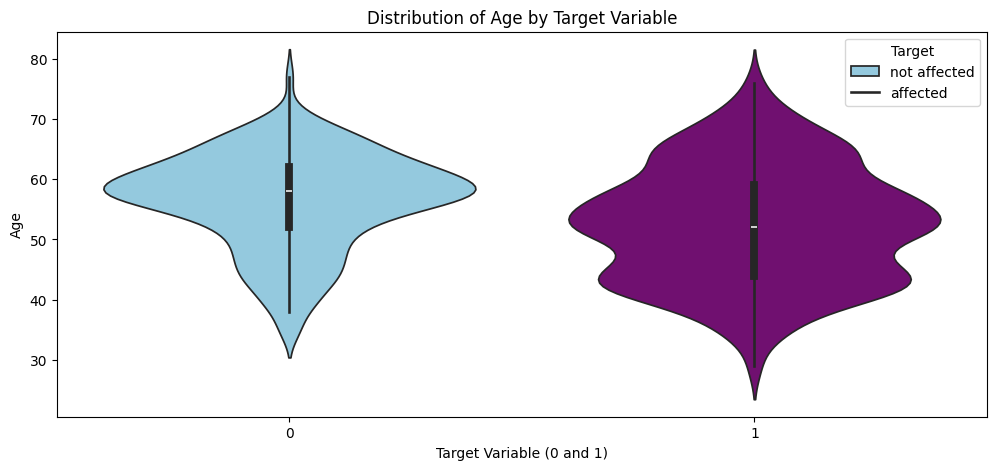

In [232]:
# Create a violin plot
plt.figure(figsize=(12, 5))
ax=sns.violinplot(x='target', y='age',hue='target', data=df, palette=('skyblue','purple'))
ax.legend(title='Target', labels=['not affected','affected'], loc='upper right')
# Add title and labels
plt.title('Distribution of Age by Target Variable')
plt.xlabel('Target Variable (0 and 1)')
plt.ylabel('Age')
#plt.xticks([0, 1], ['0', '1'])  # Customizing x-ticks for better readability
plt.show()

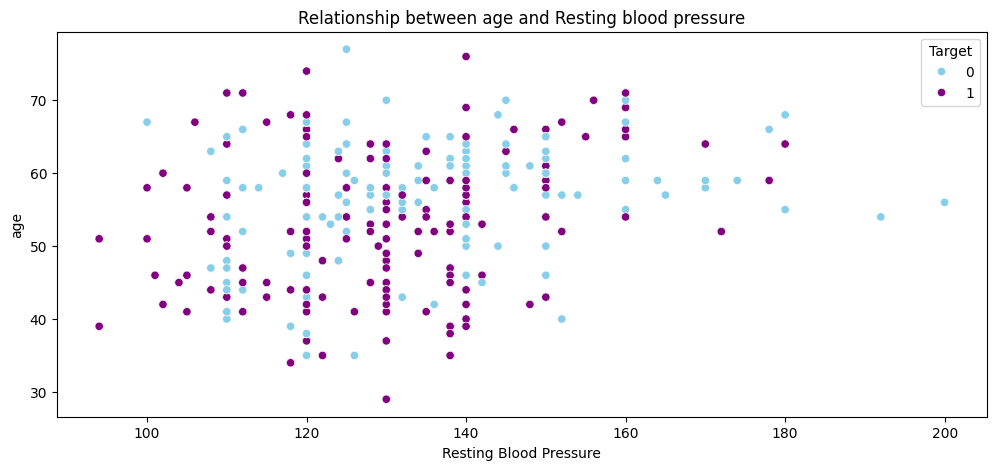

In [241]:
### relation between age and resting blood pressure
plt.figure(figsize=(12,5))
ax=sns.scatterplot(data=df,x='trestbps',y='age',hue='target',palette=('skyblue','purple'))
ax.legend(title='Target', loc='upper right')
plt.title('Relationship between age and Resting blood pressure')
plt.xlabel('Resting Blood Pressure')
plt.show()

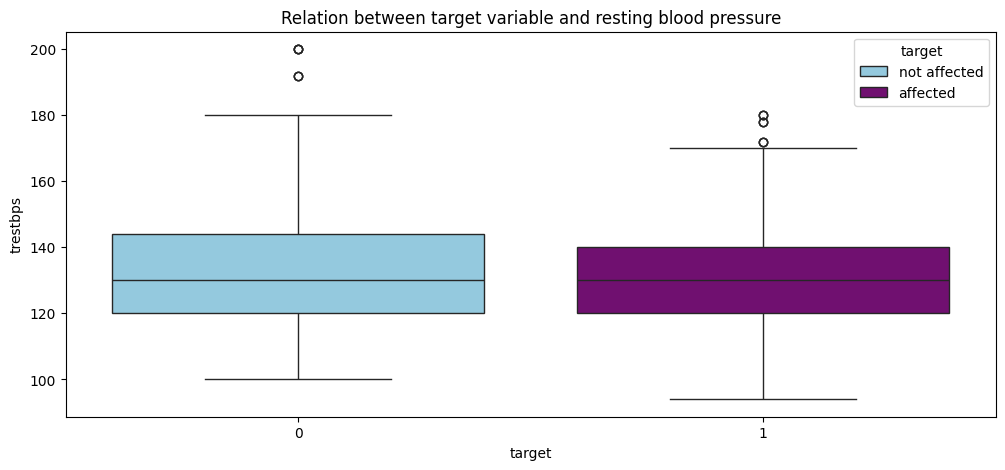

In [243]:
plt.figure(figsize=(12,5))
ax=sns.boxplot(data=df,x='target', y='trestbps',hue='target', palette=('skyblue','purple'))
ax.legend(title='target',labels=('not affected','affected'),loc='upper right')
plt.title('Relation between target variable and resting blood pressure')
plt.show()

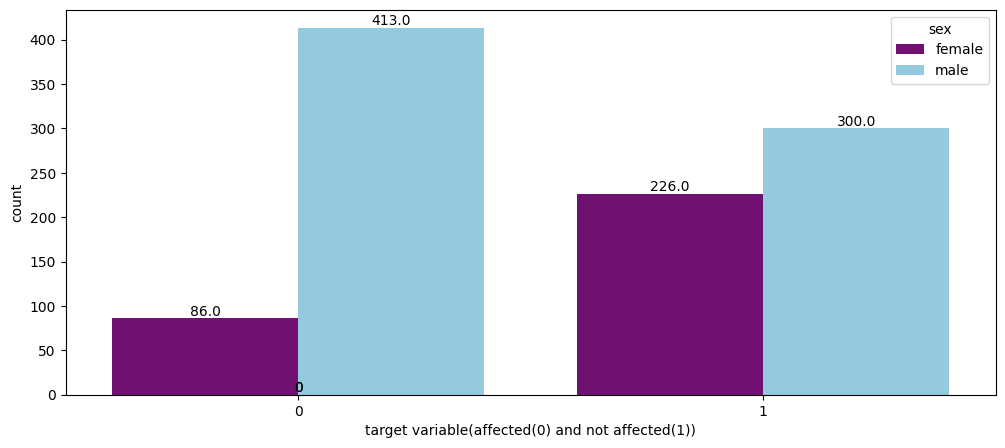

In [213]:
plt.figure(figsize=(12,5))
ax=sns.countplot(data=df,x='target',hue='sex',palette=('purple','skyblue'))
ax.legend(title='sex',labels=('female','male'))
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height}',(p.get_x()+p.get_width() / 2, height),ha='center',va='bottom')
plt.xlabel('target variable(affected(0) and not affected(1))')
plt.show()

### Findings
- The data set has 1025 entries and 14 columns
- The data types are mostly integers and floats i.e no characters
- There are no missing values in the data set
- Some of the features such as trestbps, chol, thalach, oldpeak, ca and thal contain outliers. 
- There are more males(713) than females(312) in the dataset
- The Kernel Density Estimate chart shows Age distribution is skewed slightly to the right, with most individuals concentrated between ages 40 and 70
- The violin plot shows Age distributions are similar between affected and not affected individuals, with both groups having a central concentration of ages around 50–60. However, the affected group shows slightly higher density near age 60, which might indicate that older age has a slight association with the target condition.
- The scatter plot suggests that there is no clear relationship between age and resting blood pressure for the affected and not affected groups. Both groups exhibit similar patterns, with individuals spread across various ages and resting blood pressures without a clear pattern differentiating the two groups based on these variables alone. This may indicate that resting blood pressure and age alone are not strong indicators for the target condition in this dataset.
- The boxplot shows individuals without heart disease have a slightly higher median resting blood pressure, though the distributions overlap considerably between the two groups. This suggests resting blood pressure might be a contributing factor but is not definitively different across affected and unaffected individuals.
